In [1]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import math 
import scipy.special as sp
import librosa as lb
import librosa.display as lbd

# Generating MFCCs for Various Languages

In [2]:
aud_asm, sr_asm = lb.load(r"F:\SSP\Project\dataset\assamese\m1\21.wav")
aud_ben, sr_ben = lb.load(r"F:\SSP\Project\dataset\bengali\f1\7.wav")
aud_guj, sr_guj = lb.load(r"F:\SSP\Project\dataset\gujarathi\m3\7.wav")
aud_mar, sr_mar = lb.load(r"F:\SSP\Project\dataset\marathi\f1\12.wav")
aud_man, sr_man = lb.load(r"F:\SSP\Project\dataset\manipuri\m1\49.wav")
aud_odi, sr_odi = lb.load(r"F:\SSP\Project\dataset\odia\m5\1.wav")
aud_tel, sr_tel = lb.load(r"F:\SSP\Project\dataset\telugu\20451474569644586.wav")

mfcc = []

mfcc.append(lb.feature.mfcc(y=aud_asm, sr=sr_asm, n_mfcc=13))
mfcc.append(lb.feature.mfcc(y=aud_ben, sr=sr_ben, n_mfcc=13))
mfcc.append(lb.feature.mfcc(y=aud_guj, sr=sr_guj, n_mfcc=13))
mfcc.append(lb.feature.mfcc(y=aud_mar, sr=sr_mar, n_mfcc=13))
mfcc.append(lb.feature.mfcc(y=aud_man, sr=sr_man, n_mfcc=13))
mfcc.append(lb.feature.mfcc(y=aud_odi, sr=sr_odi, n_mfcc=13))
mfcc.append(lb.feature.mfcc(y=aud_tel, sr=sr_tel, n_mfcc=13))

C:\Users\jewel\AppData\Roaming\Python\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'F:\\SSP\\Project\\dataset\\assamese\\m1\\21.wav'

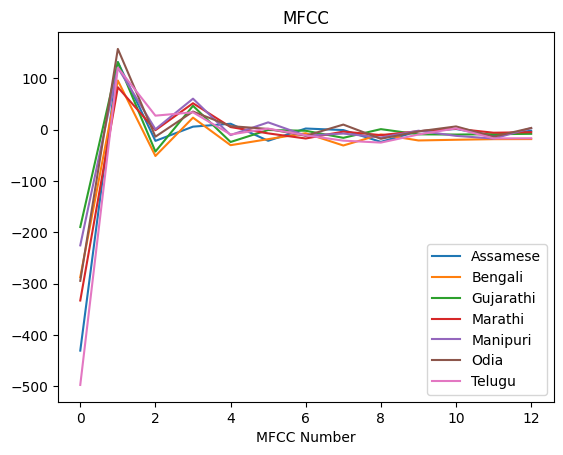

In [ ]:
for i in range(7):
    plt.plot(np.average(mfcc[:][i], axis=1))
    
plt.legend(['Assamese', 'Bengali', 'Gujarathi', 'Marathi', 'Manipuri', 'Odia', 'Telugu'])
plt.title('MFCC')
plt.xlabel('MFCC Number')
plt.savefig('mfcc_comp.png')
plt.show()

# MFCC Delta

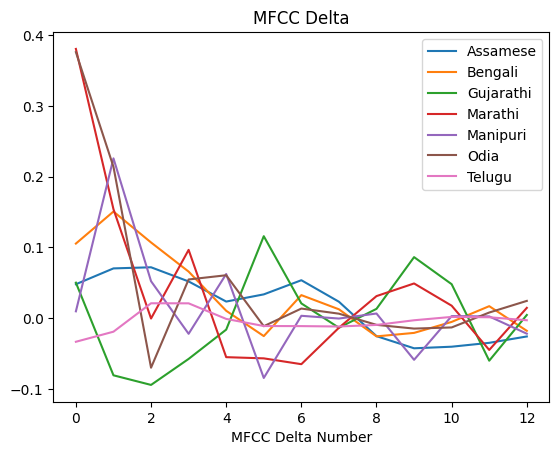

In [ ]:
mfcc_delta = []
for i in range(7):
    mfcc_delta.append(lb.feature.delta(mfcc[i]))
    mfcc_delta[i] = np.average(mfcc_delta[i], axis=1)

for i in range(7):
    plt.plot(mfcc_delta[i])

plt.legend(['Assamese', 'Bengali', 'Gujarathi', 'Marathi', 'Manipuri', 'Odia', 'Telugu'])
plt.title('MFCC Delta')
plt.xlabel('MFCC Delta Number')
plt.savefig('mfcc_delta_comp.png')
plt.show()

# MFCC Delta Delta

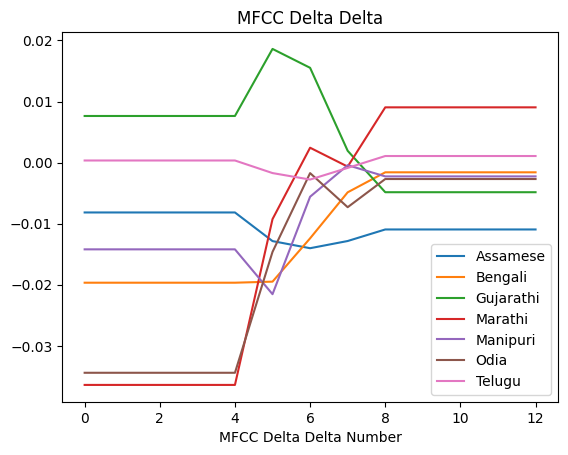

In [ ]:
mfcc_ddelta = []
for i in range(7):
    mfcc_ddelta.append(lb.feature.delta(mfcc_delta[i]))

for i in range(7):
    plt.plot(mfcc_ddelta[i])

plt.legend(['Assamese', 'Bengali', 'Gujarathi', 'Marathi', 'Manipuri', 'Odia', 'Telugu'])
plt.title('MFCC Delta Delta')
plt.xlabel('MFCC Delta Delta Number')
plt.savefig('mfcc_ddelta_comp.png')
plt.show()

# ZFF Test

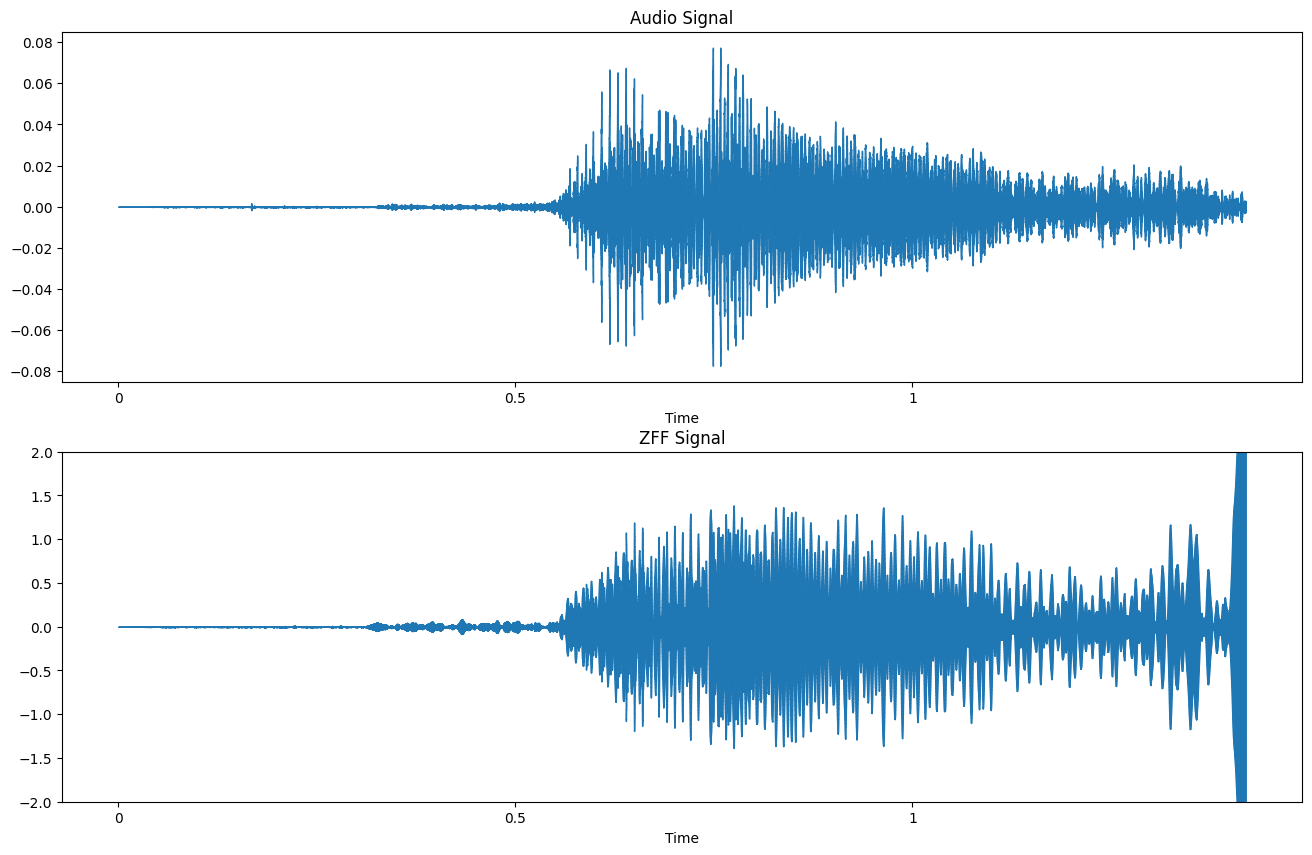

In [3]:
def ZFCC ( signal, sr, n_zfcc, frame_length, hop_length) :

        signal = np.diff ( signal )
        signal = np.cumsum ( np.cumsum ( signal )  )
        kernel = np.ones ( frame_length ) / frame_length
        signal -=  np.convolve ( signal , kernel , mode = "same")
        zfcc = lb.feature.mfcc(y=signal, sr=sr, hop_length=hop_length, n_mfcc=n_zfcc,win_length=int(0.05*sr))
        #print(zfcc.shape)
        return zfcc, signal

x, fs = lb.load("hello.wav")
_, zff_sig = ZFCC(x, fs, 13, 1024, 512)

plt.figure(figsize=(16, 10))
plt.subplot(211)
lbd.waveshow(x, sr=fs)
plt.title("Audio Signal")
plt.subplot(212)
lbd.waveshow(zff_sig, sr=fs)
plt.ylim([-2, 2])
plt.title("ZFF Signal")
plt.savefig('zff_sig.png', bbox_inches='tight')
